In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1. Importar e Preparar os Dados

In [5]:
url = 'https://raw.githubusercontent.com/fernandoawari/calculadora-aluguel-turma-set-20/main/2-manipulacao/dados_aluguel_ml_sao_paulo_preprocessado.csv'

In [6]:
data = pd.read_csv(url)
data.head()

,zona,enderecos_lista,area,quartos,aluguel
0,norte,"Praça Rafael Mendes De Carvalho, Jardim Paraís...",50.0,2.0,1150
1,norte,"Rua Almirante Noronha, Jardim São Paulo, São P...",76.0,3.0,1480
2,norte,"Rua Cássio De Almeida, Vila Guilherme, São Pau...",30.0,1.0,800
3,norte,"Rua Cabo José Da Silva, Parque Novo Mundo, São...",80.0,3.0,1180
4,norte,"Parque Domingos Luís, Jardim São Paulo, São Pa...",70.0,2.0,1300


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
area,1341.0,112.697987,259.503149,1.0,48.0,67.0,106.0,7800.0
quartos,1273.0,2.106834,0.882869,1.0,1.0,2.0,3.0,5.0
aluguel,1344.0,4396.404762,29225.842756,299.0,1500.0,2200.0,3577.5,870000.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zona             1344 non-null   object 
 1   enderecos_lista  1344 non-null   object 
 2   area             1341 non-null   float64
 3   quartos          1273 non-null   float64
 4   aluguel          1344 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 52.6+ KB


In [10]:
from sklearn.model_selection import train_test_split

In [31]:
train, test = train_test_split(data, test_size=0.25, random_state=123, stratify=data['zona'])

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 221 to 904
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zona             1008 non-null   object 
 1   enderecos_lista  1008 non-null   object 
 2   area             1005 non-null   float64
 3   quartos          948 non-null    float64
 4   aluguel          1008 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 47.2+ KB


In [33]:
train['zona'].value_counts()

sul      252
norte    252
leste    252
oeste    252
Name: zona, dtype: int64

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 419 to 1159
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zona             336 non-null    object 
 1   enderecos_lista  336 non-null    object 
 2   area             336 non-null    float64
 3   quartos          325 non-null    float64
 4   aluguel          336 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 15.8+ KB


In [35]:
test['zona'].value_counts()

sul      84
leste    84
oeste    84
norte    84
Name: zona, dtype: int64

In [36]:
test.head()

,zona,enderecos_lista,area,quartos,aluguel
419,sul,"Rua Abagiba, Saúde, São Paulo Zona Sul, São Paulo",52.0,2.0,2020
366,sul,"Rua Francisco José Da Silva, Vila Andrade, São...",40.0,1.0,1502
618,sul,"Rua Maracá, Vila Guarani (z Sul), São Paulo Zo...",47.0,2.0,1610
653,sul,"Avenida Barão De Campos Gerais, Real Parque, S...",115.0,3.0,3000
248,norte,"Rua Voluntários Da Pátria, Santana, São Paulo ...",40.0,1.0,2500


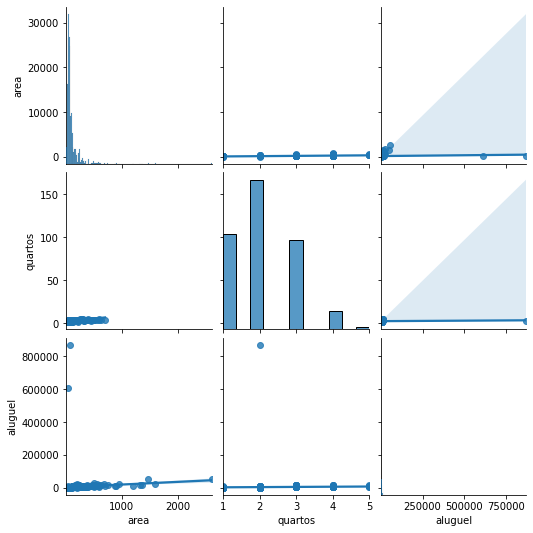

In [37]:
sns.pairplot(train, kind='reg')

In [63]:
train['aluguel']=train['aluguel'].apply(np.log1p)
train['area']=train['area'].apply(np.log1p)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
test['aluguel']=test['aluguel'].apply(np.log1p)
test['area']=test['area'].apply(np.log1p)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


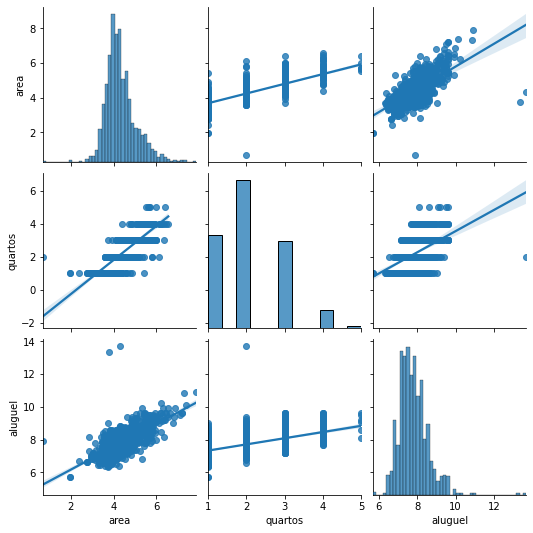

In [64]:
sns.pairplot(train, kind='reg')

In [66]:
X_cols = ['zona', 'area', 'quartos']
y_col = ['aluguel']

In [67]:
X_train = train[X_cols]
X_test = test[X_cols]
y_train = train[y_col]
y_test = test[y_col]

In [68]:
X_train.head()

,zona,area,quartos
221,norte,4.007333,2.0
956,leste,4.406719,3.0
721,leste,4.454347,2.0
604,sul,4.369448,3.0
119,norte,4.875197,NaN


In [69]:
# Tratar colunas categoricas
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [70]:
X_train.head()

,area,quartos,zona_leste,zona_norte,zona_oeste,zona_sul
221,4.007333,2.0,0,1,0,0
956,4.406719,3.0,1,0,0,0
721,4.454347,2.0,1,0,0,0
604,4.369448,3.0,0,0,0,1
119,4.875197,NaN,0,1,0,0


In [71]:
# Tratar valores ausente
# Importante: Usar informações do conjunto de treino
train_medians = X_train.median()
X_train=X_train.fillna(train_medians)
X_test=X_test.fillna(train_medians)

In [72]:
X_train.head()

,area,quartos,zona_leste,zona_norte,zona_oeste,zona_sul
221,4.007333,2.0,0,1,0,0
956,4.406719,3.0,1,0,0,0
721,4.454347,2.0,1,0,0,0
604,4.369448,3.0,0,0,0,1
119,4.875197,2.0,0,1,0,0


## 2. Machine Learning
### 2.1 Definição de Métrica
Métricas para regressão:
- Mean Absolute Error
- Mean Squared Error
- R2 Score
- Root Mean Squared Error



### 2.2 Modelo Base

In [73]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [74]:
y_pred = neigh.predict(X_test)

In [75]:
# Root Mean Squared Error
np.sqrt(np.mean((y_pred-y_test.values)**2))

0.4736086843481374

In [76]:
# Mean Squared Error
np.mean((y_pred-y_test.values)**2)

0.22430518588997367

In [77]:
# Mean Absolute Error
np.mean(np.abs(y_pred-y_test.values))

0.3616742058829231

In [78]:
# R2 Score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5161897704625475

## 3. Triagem com Outros Modelos

In [79]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

reg.score(X_test, y_test)

0.608198296027433

In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

regressor_list = [DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_train, y_train)
  train_score = reg.score(X_train, y_train)
  test_score = reg.score(X_test, y_test)
  print('Train score', train_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.873371877020912
Test score 0.19057960402687713
Treinando RandomForestRegressor


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train score 0.8346844945242042
Test score 0.42885467387397774
Treinando MLPRegressor


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score 0.5396649006508168
Test score 0.621161165023365
Treinando XGBRegressor
[23:40:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.6216956272925864
Test score 0.6031620068446988


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [85]:
len(X_train)//3

336

In [88]:
X1=X_train[:336]
X2=X_train[336:2*336]
X3=X_train[2*336:]

In [90]:
# Repetindo com validação cruzada
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


regressor_list = [DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_train, y_train)
  train_score = reg.score(X_train, y_train)
  val_score = cross_val_score(reg, X_train, y_train, cv=3)
  test_score = reg.score(X_test, y_test)
  print('Train score', train_score)
  print('Validation score', val_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.873371877020912
Validation score [-0.08667679  0.29177295  0.32704026]
Test score 0.19164895412537397
Treinando RandomForestRegressor
Train score 0.8246171163217598
Validation score [0.38909998 0.42697731 0.40295247]
Test score 0.4791743555108417
Treinando MLPRegressor
Train score 0.538230888832081
Validation score [0.47803568 0.55485891 0.54032809]
Test score 0.6083513510408592
Treinando XGBRegressor
[23:48:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:48:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.6216956272925864
Validation

In [102]:
# TODO: Calibração de modelo
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4],
             'max_depth':[3,4,5,6,7,8],
             'n_estimators':[50, 100, 200]}]
            
xgb = XGBRegressor(n_estimators=100, max_depth=1)
gs = GridSearchCV(xgb,parameters,scoring='r2',n_jobs=-1,cv=3)
gs.fit(X_train, y_train)

[23:57:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=1,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'learning_rate': [0.1, 0.2, 0.3, 0.4],
                          'max_depth': [3, 4, 5, 6, 7, 8],
          

In [103]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [104]:
reg = gs.best_estimator_

In [105]:
train_score = reg.score(X_train, y_train)
val_score = cross_val_score(reg, X_train, y_train, cv=3)
test_score = reg.score(X_test, y_test)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

[23:58:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.5789568757784442
Validation score [0.4992717  0.51989244 0.50999327]
Test score 0.6060030969986206


In [106]:
import pickle
# now you can save it to a file
with open('xgboost_regression.pkl', 'wb') as f:
    pickle.dump(reg, f)

## and later you can load it
#with open('filename.pkl', 'rb') as f:
#    clf = pickle.load(f)